<a href="https://colab.research.google.com/github/vikiluch/viki/blob/main/heart_attack_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df=pd.read_csv("/content/drive/MyDrive/heart.csv")

In [13]:
df=df.drop(['oldpeak', 'slp', 'thall'],axis=1)

In [14]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


data analysis

exang: exercise induced angina (1=yes, 0=no)
ca: nimber of major vessels (0-3)
cp:chest pain type
-value0: typical angina
-value1: atypical angina
-value2: non-anginal pain
value 3: asymptomatic

trtbps: resting blood pressure (in mm Hg)
chl:cholesteral in ma/dl fetched via BMI sensor
fbs: (fasting blood sugar >120 mg/dl)(1=true; 0=false)
rest_ecg: resting electrocardiographic results
-val 0: normal
-val 1: having ST-T wave abnormality (T wave inversions and /or ST elevation or depression of > 0.05 mV)
-val 2: showing probable or definite left verticular hypertrophy by Estes' criteria
thalach: max heart rate achieved
target:
0-less chance of heart attack
1=more chance of heart attack


> Indented block



> Indented block



In [15]:
df.shape

(303, 11)

In [16]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
caa         0
output      0
dtype: int64

In [17]:

df.corr()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.181053,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.072042,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.213177,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.115739,-0.436757
caa,0.276326,0.118261,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,1.000000,-0.391724


<Axes: >

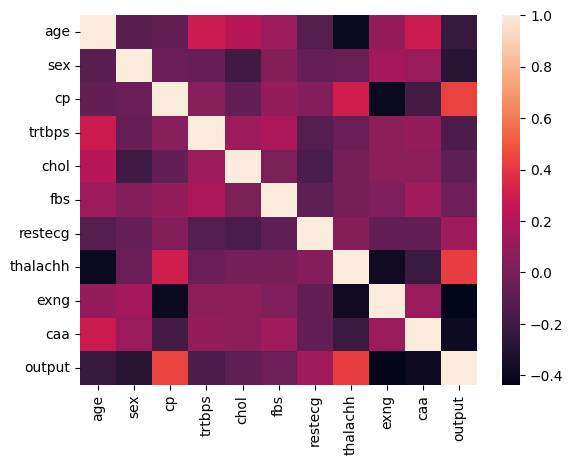

In [18]:
sns.heatmap(df.corr())

we can see that our variables not highly correlated to each other

we have to do Uni and Bi variate analysis on our Model

<Axes: title={'center': "Patient's age"}, xlabel='age', ylabel='count'>

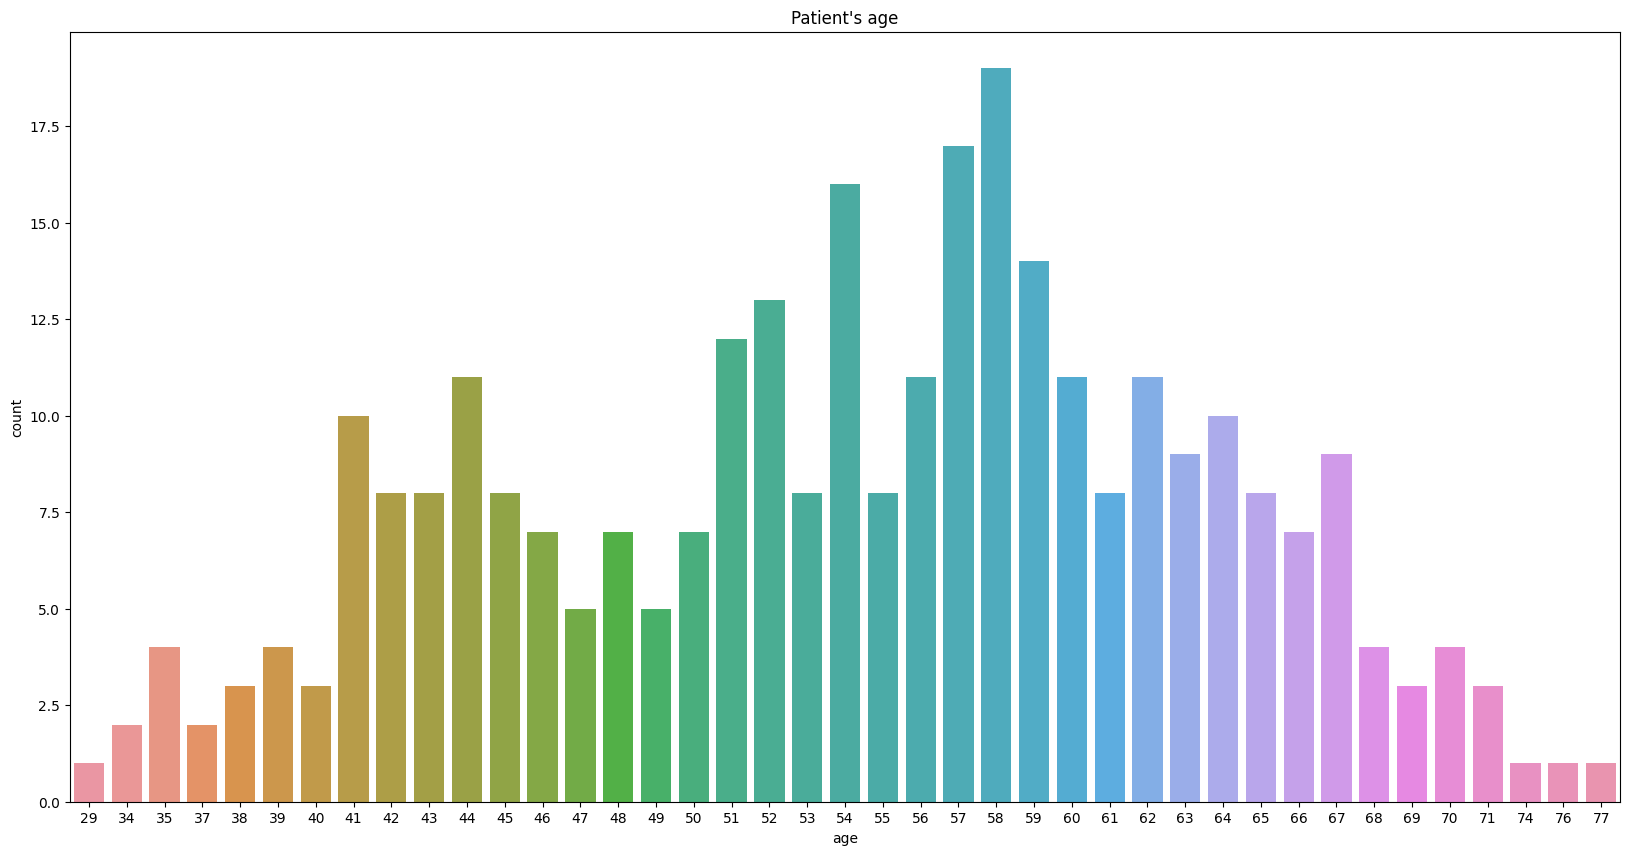

In [20]:
plt.figure(figsize=(20,10))
plt.title("Patient's age")
plt.xlabel("Age")
sns.countplot(x='age', data=df)

as we can see the patients are of Age Group 51-67 years in majority

<Axes: title={'center': 'Sex of the patients, 0=female, 1=male'}, xlabel='sex', ylabel='count'>

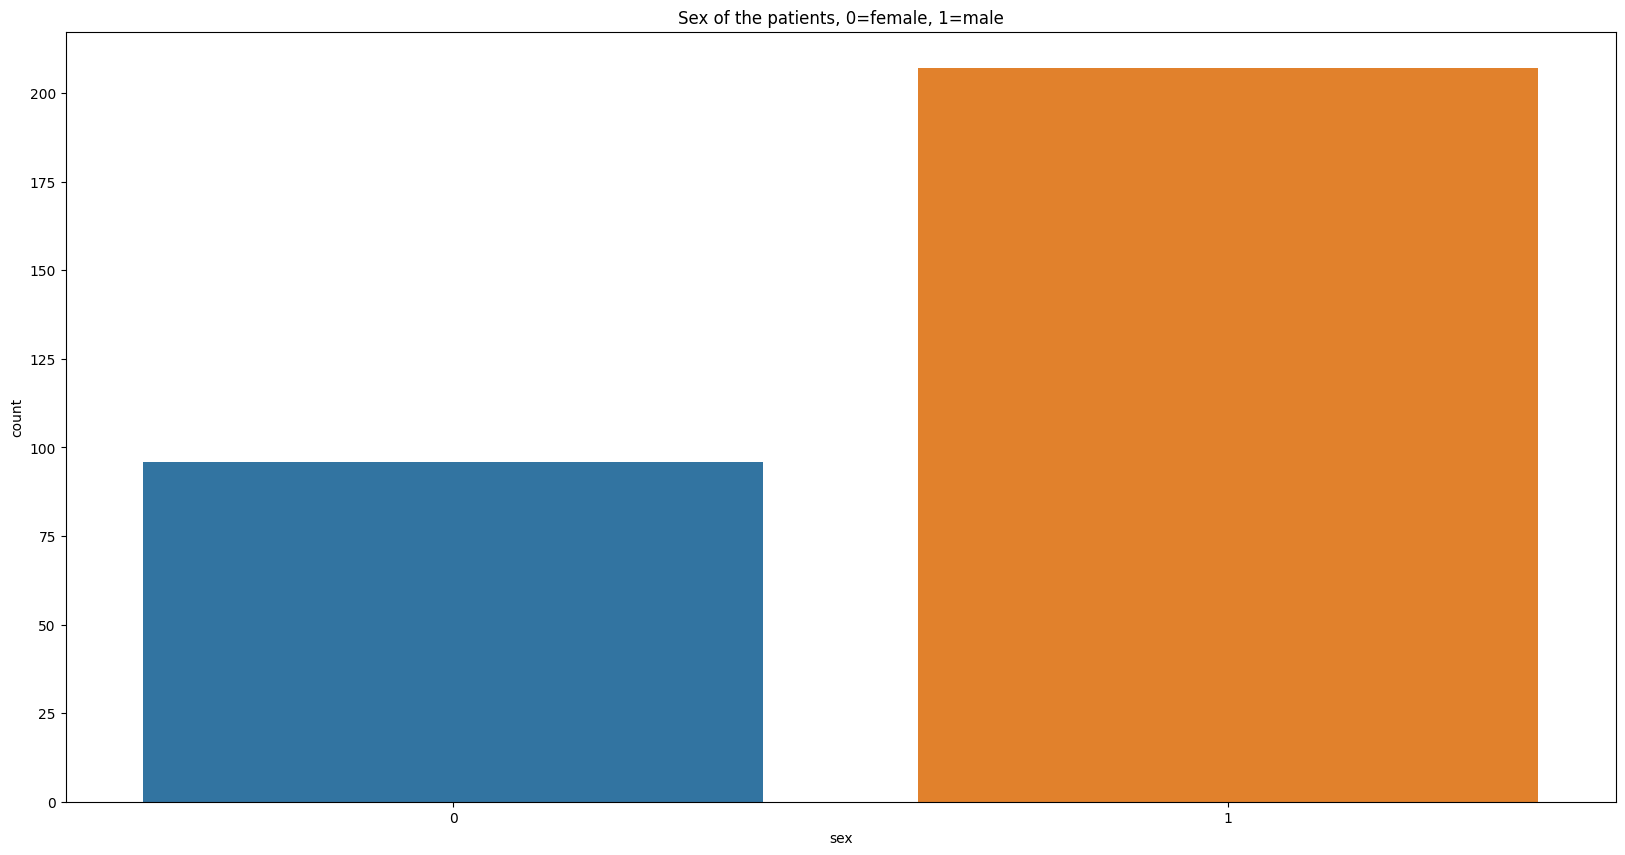

In [21]:
plt.figure(figsize=(20, 10))
plt.title("Sex of the patients, 0=female, 1=male")

sns.countplot(x='sex',data=df)

lets return object containing counts of unique values. The resulting object will be in descending order

countplot= It uses the concept of a bar chart for the visual depiction.

In [22]:
cp_data=df['cp'].value_counts().reset_index()
cp_data['index'][3]='asymptomatic'
cp_data['index'][2]='non-anginal'
cp_data['index'][1]='atyppical angina'
cp_data['index'][0]='typical angina'
cp_data

,index,cp
0,typical angina,143
1,atyppical angina,87
2,non-anginal,50
3,asymptomatic,23


<Axes: title={'center': 'Chest pain of the patients'}, xlabel='index', ylabel='cp'>

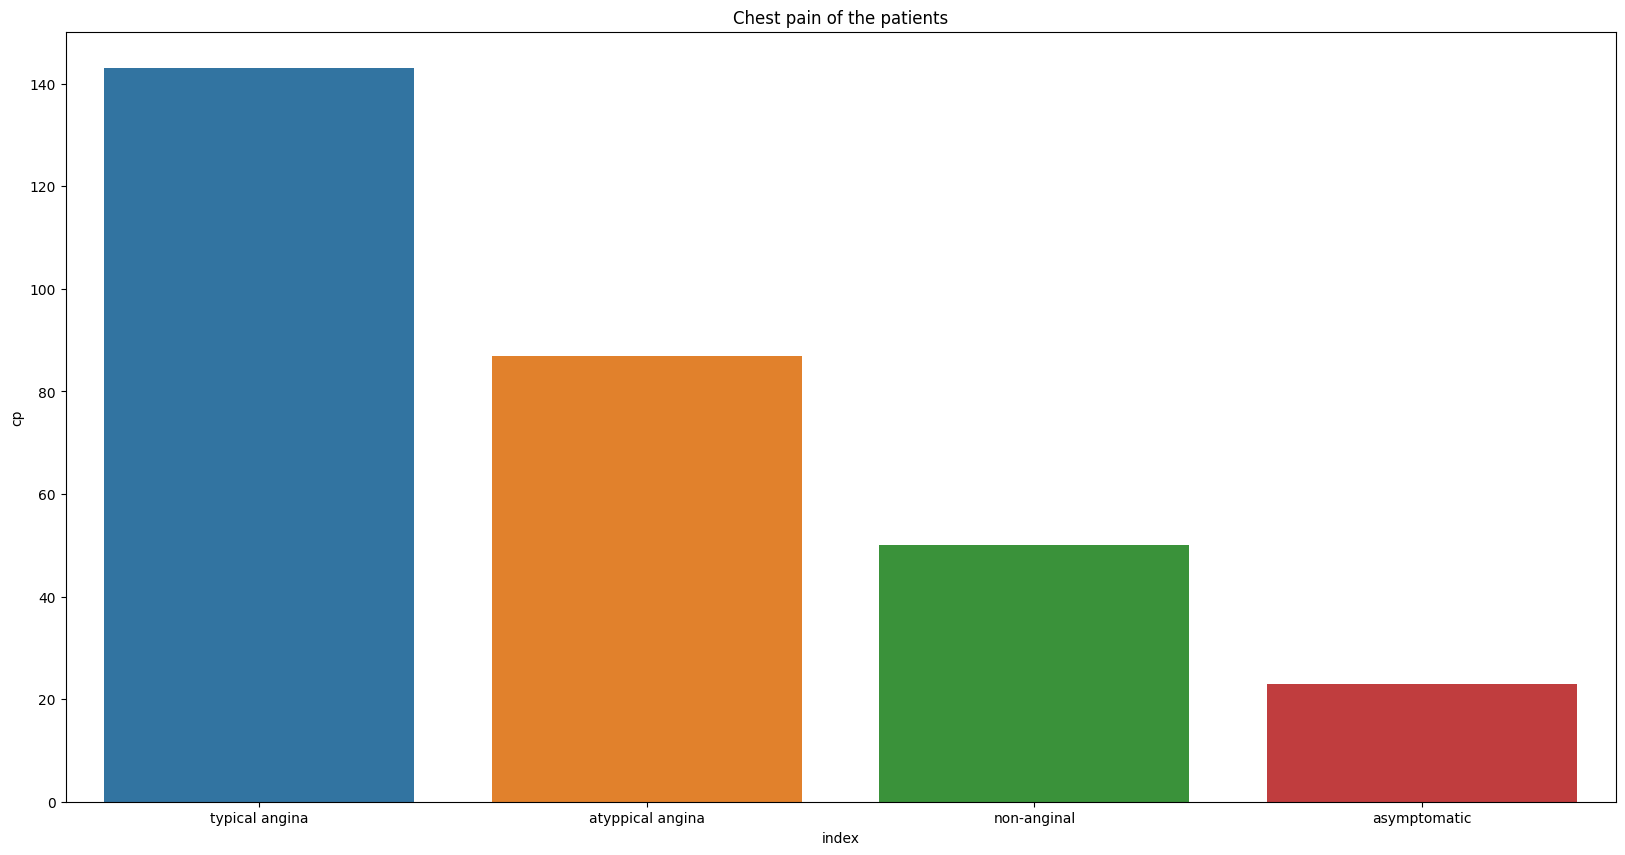

In [23]:
plt.figure(figsize=(20,10))
plt.title("Chest pain of the patients")
sns.barplot(x=cp_data['index'], y=cp_data['cp'])

In [24]:
ecg_data=df['restecg'].value_counts().reset_index()
ecg_data['index'][0]='normal'
ecg_data['index'][1]='having ST-T wave abnormality'
ecg_data['index'][2]='showing probable or definite left ventricular hypertrophy by Estes'
ecg_data


,index,restecg
0,normal,152
1,having ST-T wave abnormality,147
2,showing probable or definite left ventricular ...,4


<Axes: title={'center': 'ECG data of the patients'}, xlabel='index', ylabel='restecg'>

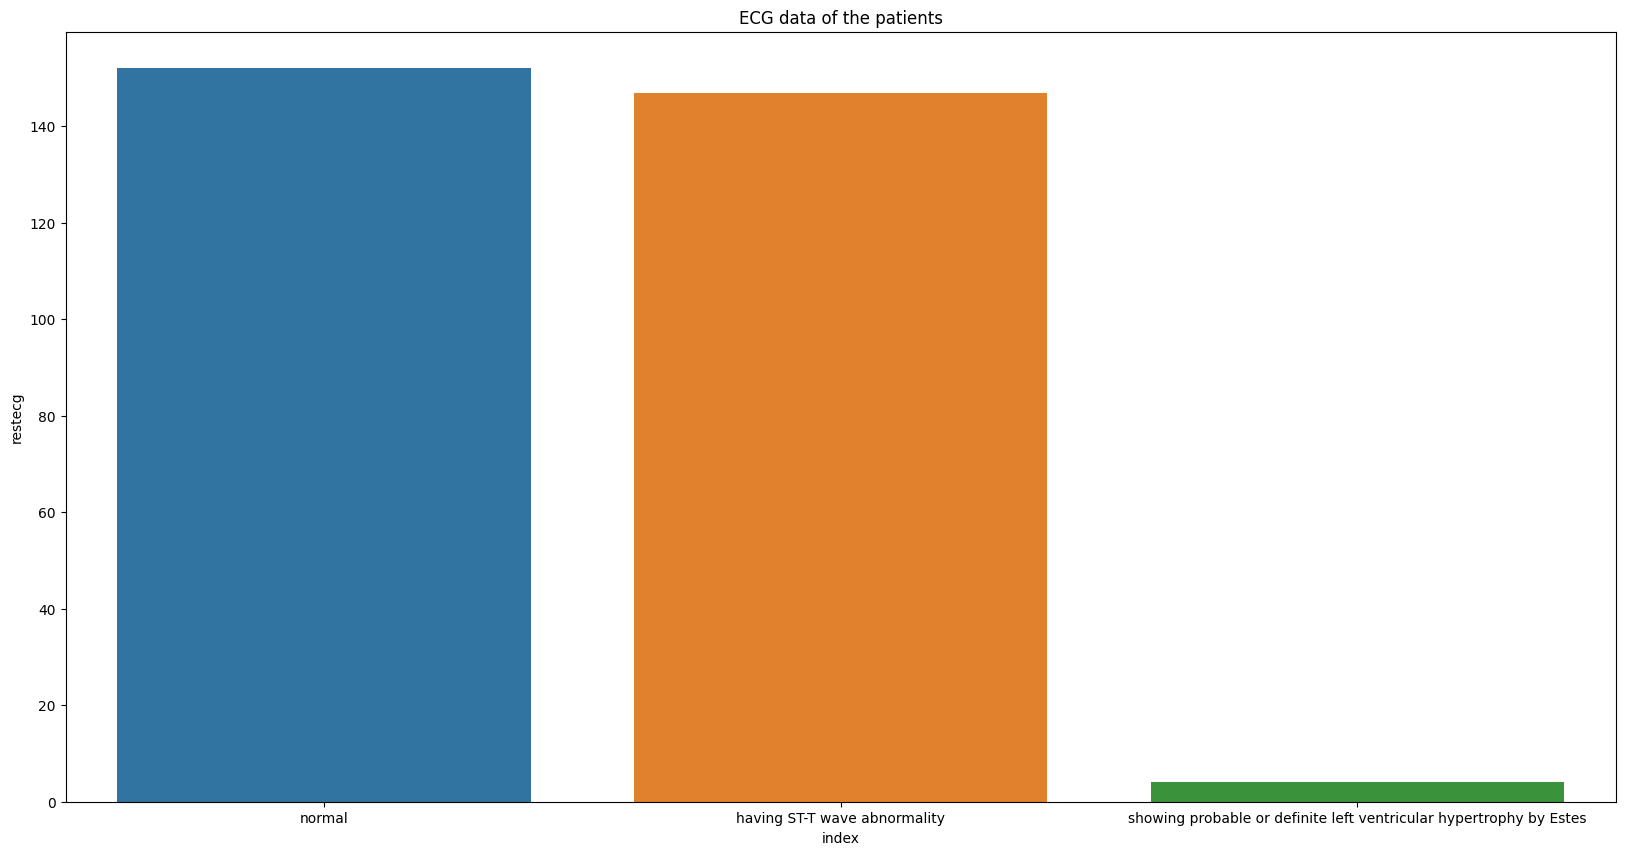

In [25]:
plt.figure(figsize=(20,10))
plt.title("ECG data of the patients")
sns.barplot(x=ecg_data['index'], y=ecg_data['restecg'])

This is our EGC data

In [26]:
sns.pairplot(df,hue='output', data= df)

TypeError: ignored

lets see for our continuous variable

<ipython-input-27-325ca54b1603>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trtbps'], kde=True, color='magenta')
<ipython-input-27-325ca54b1603>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['thalachh'], kde=True, color='teal')


Text(0.5, 0, 'Maximum heart rate achived(bpm)')

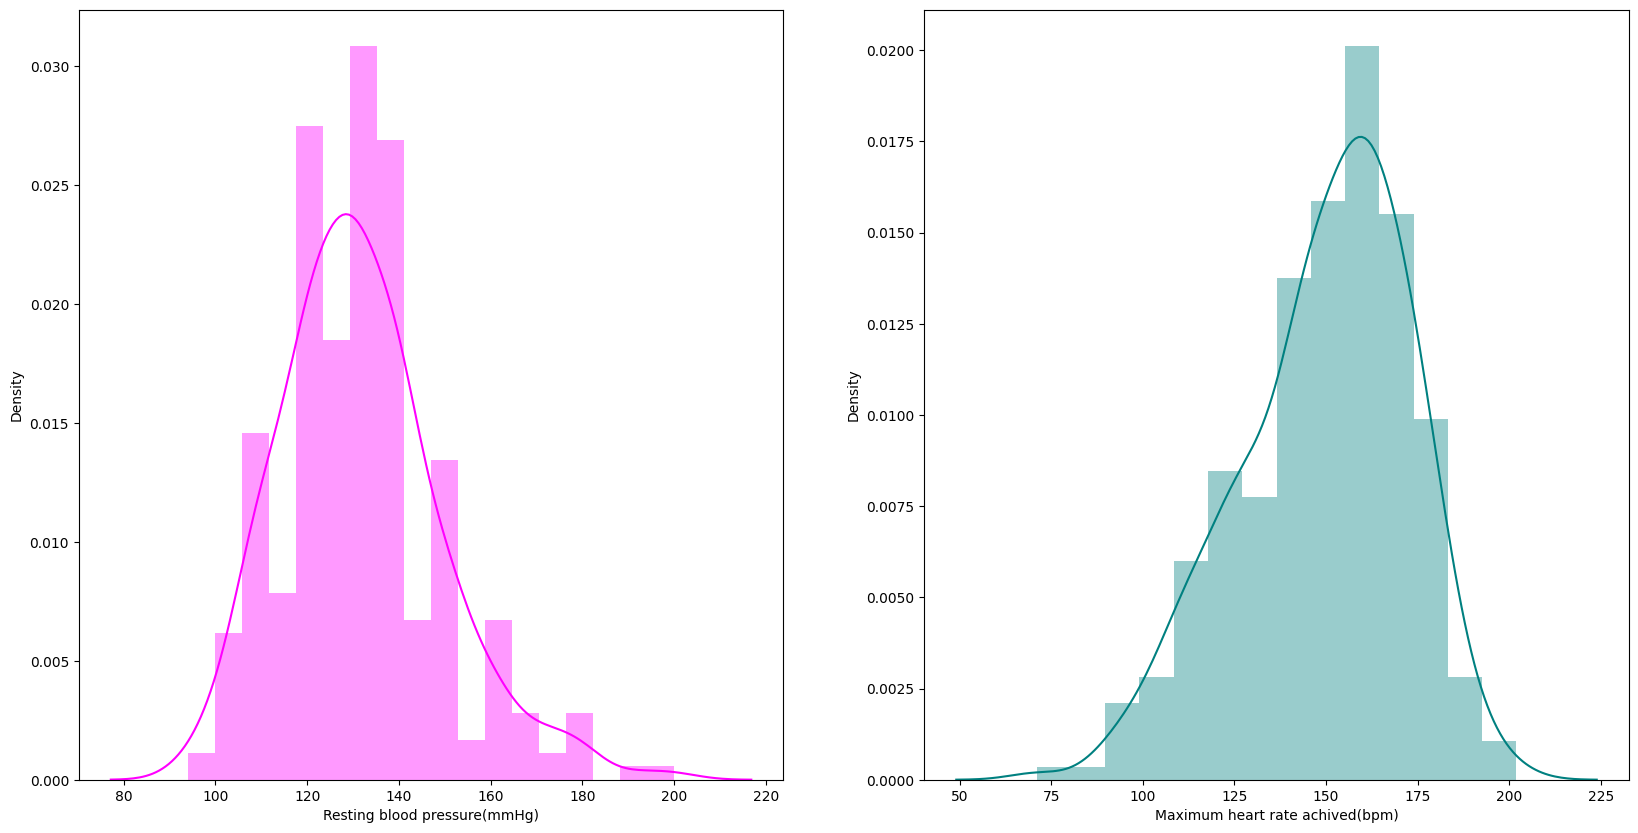

In [27]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df['trtbps'], kde=True, color='magenta')
plt.xlabel("Resting blood pressure(mmHg)")
plt.subplot(1,2,2)
sns.distplot(df['thalachh'], kde=True, color='teal')
plt.xlabel("Maximum heart rate achived(bpm)")

We can see that our data is normaly distributed,which is very good sign

.distplot=The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution. The seaborn. distplot() function accepts the data variable as an argument and returns the plot with the density distribution

We start by creating a figure using the figure and then used the subplot (2, 1, 1) to specify that the first subplot should be placed in a 2-row, 1-column grid at position 1. For this subplot, we plot the dataset X versus Y and add a title, x-axis label, and y-axis label.

<ipython-input-28-0b5422b7b568>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chol'], kde=True, color='red')


Text(0.5, 0, 'Cholesterol')

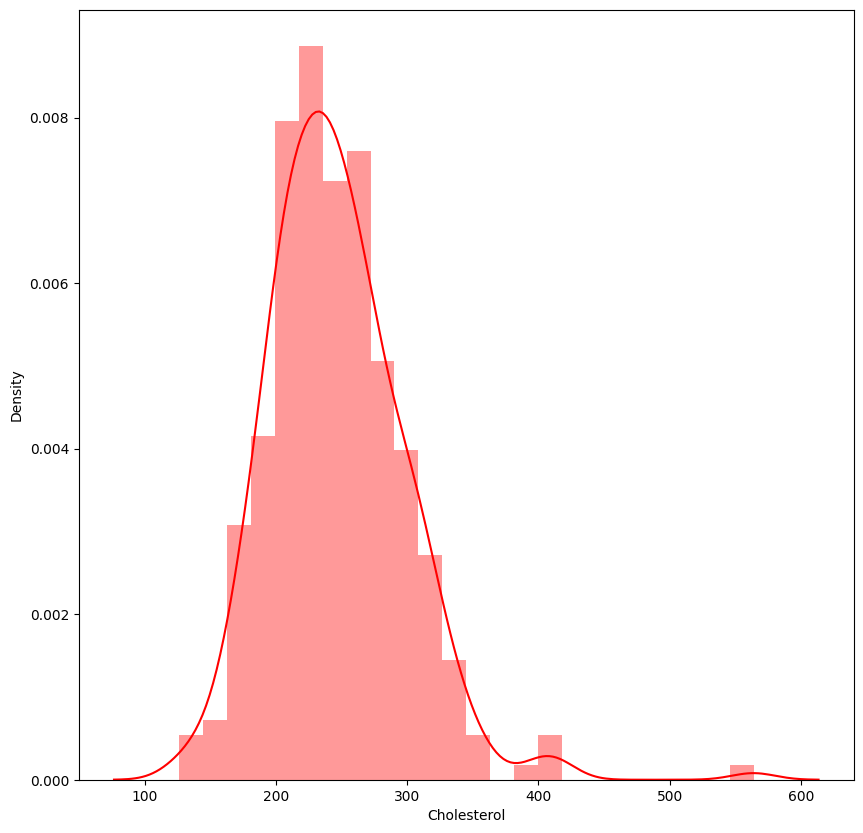

In [28]:
plt.figure(figsize=(10,10))
sns.distplot(df['chol'], kde=True, color='red')
plt.xlabel("Cholesterol")

we can see its normaly distributed but we can see some outliers on 550 marks, which is not affect this much

In [29]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


Now we can apply thet in our ML models using the primitive techniques

**MODEL**

before modeling we have to know if the data: continuous or categorical?
We will apply a technique called Standart scaler, which will basically standardize or scale my values to a common platform so my model will not have much variation.

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scale=StandardScaler()

In [32]:
scale.fit(df)

StandardScaler()

In [33]:
df=scale.transform(df)

In [34]:
df=pd.DataFrame(df,columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'caa', 'output'])

In [35]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429,0.914529


our values range from -1 to 1 which will retrospect with our model

WE CAN INSERT THIS DATA INTO OUR ML MODELS

we can use the following models for our predictions:


*   Logistic REgression
*   Decision Tree
*   Random Forest
*   K Nearest Neighbour
*   SVM (support vector machine)

Then we will use the ensembling techniques


lets split our data on dependent and independent variables:








x goes for independent variables, which are different attributes and wider output

In [36]:
x=df.iloc[:,:-1]
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429
...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.714429
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,-0.714429
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,1.244593
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.265082


In [37]:
y=df.iloc[:,-1:]
y

,output
0,0.914529
1,0.914529
2,0.914529
3,0.914529
4,0.914529
...,...
298,-1.093459
299,-1.093459
300,-1.093459
301,-1.093459


y has dependent variables


Now lets import train test which is split our data with 70% for train data and 30% for test data

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
lbl=LabelEncoder()

In [62]:
encoded_y=lbl.fit_transform(y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
logreg=LogisticRegression()

In [69]:
logreg=LogisticRegression()
logreg.fit(x_train, encoded_y)

LogisticRegression()

In [74]:
Y_pred1

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0])

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [72]:
encoded_ytest=lbl.fit_transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
Y_pred1=logreg.predict(x_test)
lr_conf_matrix=confusion_matrix(encoded_ytest,Y_pred1)
lr_acc_score=accuracy_score(encoded_ytest, Y_pred1)

In [76]:
lr_conf_matrix

array([[35,  9],
       [ 4, 43]])

In [77]:
print(lr_acc_score*100,"%")

85.71428571428571 %


As we can see LR Model has a 85% accuracy

**Decision Tree **

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
tree=DecisionTreeClassifier()

In [80]:
tree.fit(x_train,encoded_y)

DecisionTreeClassifier()

In [81]:
ypred2=tree.predict(x_test)

In [82]:
tree_conf_matrix=confusion_matrix(encoded_ytest,ypred2)
tree_acc_score=accuracy_score(encoded_ytest,ypred2)

In [83]:
tree_conf_matrix

array([[26, 18],
       [10, 37]])

In [84]:
print(tree_acc_score*100,"%")

69.23076923076923 %


As we can see the Decision Tree Model does not perform well as it gives a score of only 69%

RANDOM FOREST

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rf=RandomForestClassifier()

In [87]:
rf.fit(x_train, encoded_y)

RandomForestClassifier()

In [88]:
ypred3=rf.predict(x_test)

In [89]:
rf_conf_matrix=confusion_matrix(encoded_ytest, ypred3)
rf_acc_score=accuracy_score(encoded_ytest, ypred3)

In [90]:
rf_conf_matrix

array([[32, 12],
       [ 6, 41]])

In [91]:
print(rf_acc_score*100, "%")

80.21978021978022 %


RF also gives us an accuracy of around 80%

**K Nearest Neighbour**
we will use the method to find out what is an optimum number for k

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
error_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,encoded_y)
  pred=knn.predict(x_test)
  error_rate.append(np.mean(pred !=encoded_ytest))

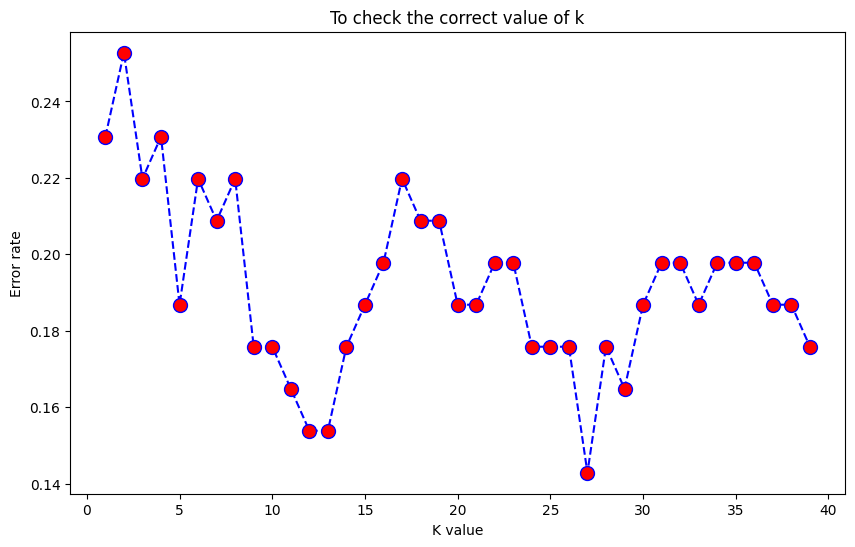

In [94]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('K value')
plt.ylabel('Error rate')
plt.title('To check the correct value of k')
plt.show()

as we can see from the figure that k value from 11 to 12 is actually very good figure ,they are following a minimum amount of error rate rather than 26.  if we use 27 -its lead us to overfitting of the model.

As we can see from the graph we should select K=12 as it gives us the best error rate

In [95]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,encoded_y)
ypred4=knn.predict(x_test)

In [96]:
knn_conf_matrix=confusion_matrix(encoded_ytest,ypred4)
knn_acc_score=accuracy_score(encoded_ytest,ypred4)

In [97]:
knn_conf_matrix

array([[35,  9],
       [ 5, 42]])

In [98]:
print(knn_acc_score*100, "%")

84.61538461538461 %


As we can see KNN gives us an accuracy of arounf 78% which is good

SUPPORT VECTOR MACHINE (SVM)




In [99]:
from sklearn import svm

In [100]:
svm=svm.SVC()

In [101]:
svm.fit(x_train, encoded_y)

SVC()

In [102]:
ypred5=svm.predict(x_test)

In [103]:
svm_conf_matrix=confusion_matrix(encoded_ytest,ypred5)
svm_acc_score=accuracy_score(encoded_ytest,ypred5)

In [104]:
svm_conf_matrix

array([[34, 10],
       [ 8, 39]])

In [105]:
print(svm_acc_score*100,"%")

80.21978021978022 %


We get accuracy of 80% in SVM

Lets use our model accuracy in Table form

In [106]:
model_acc=pd.DataFrame({'Model': ['LR', 'DT','RF','KNN','SVM'], 'Accuracy':[lr_acc_score*100, tree_acc_score*100, rf_acc_score*100, knn_acc_score*100, svm_acc_score*100]})

In [107]:
model_acc=model_acc.sort_values(by=['Accuracy'],ascending=False)

In [108]:
model_acc

,Model,Accuracy
0,LR,85.714286
3,KNN,84.615385
2,RF,80.219780
4,SVM,80.219780
1,DT,69.230769


Lets us one more Techniques known as Adaboost this is a Boost technique which uses multiple models for better accuracy


ADABOOST Classifier
lets first use some random parameters for training the model without Hypertuning


In [109]:
from sklearn.ensemble import AdaBoostClassifier

In [110]:
adab=AdaBoostClassifier(base_estimator=svm, n_estimators=100, algorithm='SAMME', learning_rate=0.01,random_state=0)

In [111]:
adab.fit(x_train, encoded_y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME', base_estimator=SVC(), learning_rate=0.01,
                   n_estimators=100, random_state=0)

In [112]:
ypred6=adab.predict(x_test)

In [113]:
adab_conf_matrix=confusion_matrix(encoded_ytest, ypred6)
adab_acc_score=accuracy_score(encoded_ytest, ypred6)

In [114]:
adab_conf_matrix

array([[ 0, 44],
       [ 0, 47]])

In [115]:
print(adab_acc_score*100,'%')

51.64835164835166 %


we can see our model has 51% accuracy

We will use Grid Seach CV for HyperParameter Tuning
Grid Search CV
Lets try Grid Search CV for our toop 3 performing Algorithms for HyperParametr Tuning

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
model_acc

,Model,Accuracy
0,LR,85.714286
3,KNN,84.615385
2,RF,80.219780
4,SVM,80.219780
1,DT,69.230769


LOGISTIC REGRESSION

In [118]:
param_grid={
    'solver' :['newton-c', 'lrfgs', 'liblinear', 'sag', 'saga'],
'penalty':['non', 'l1', 'l2', 'elasticnet'],
            'C':[100, 10, 1.0, 0.1, 0.01]

}

In [119]:
grid1=GridSearchCV(LogisticRegression(),param_grid)

In [120]:
grid1.fit(x_train,encoded_y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
375 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/skl

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['non', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-c', 'lrfgs', 'liblinear', 'sag',
                                    'saga']})

In [121]:
grid1.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

We will apply this parameter to this model ans see how this perform

In [122]:
logreg1=LogisticRegression(C=0.01,penalty='l2',solver='liblinear')

In [123]:
logreg1.fit(x_train,encoded_y)

LogisticRegression(C=0.01, solver='liblinear')

In [124]:
logreg_pred=logreg1.predict(x_test)

In [125]:
logreg_pred_conf_matrix=confusion_matrix(encoded_ytest,logreg_pred)
logreg_pred_acc_score=accuracy_score(encoded_ytest, logreg_pred)

In [126]:
logreg_pred_conf_matrix

array([[33, 11],
       [ 6, 41]])

In [127]:
print(logreg_pred_acc_score*100, "%")

81.31868131868131 %


KNN

In [128]:
knn=KNeighborsClassifier(n_neighbors=12, metric='manhattan', weights='distance')
knn.fit(x_train,encoded_y)
knn_pred=knn.predict(x_test)

In [129]:
knn_pred_conf_matrix=confusion_matrix(encoded_ytest, knn_pred)
knn_pred_acc_score=accuracy_score(encoded_ytest, knn_pred)


In [130]:
knn_pred_conf_matrix

array([[33, 11],
       [ 5, 42]])

In [131]:
print(knn_pred_acc_score*100, '%')

82.41758241758241 %


Which parameter is the best?
SVM

In [132]:
kernel=['poly', 'rbf', 'sigmoid']
C=[50,10,1.0,0.1,0.01]
gamma=['scale']

In [133]:
from sklearn.model_selection import RepeatedStratifiedKFold
grid = dict(kernel=kernel, C=C, gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svm, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)

In [134]:
grid_search.fit(x_train, encoded_y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [135]:
grid_search.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}

lets use these

In [136]:
from sklearn.svm import SVC

In [137]:
svc=SVC(C=0.1, gamma='scale', kernel='sigmoid')

In [138]:
svc.fit(x_train,encoded_y)

SVC(C=0.1, kernel='sigmoid')

In [139]:
svm_pred=svc.predict(x_test)

In [140]:
svm_pred_conf_matrix=confusion_matrix(encoded_ytest, svm_pred)
svm_pred_acc_score=accuracy_score(encoded_ytest, svm_pred)

In [141]:
svm_pred_conf_matrix

array([[32, 12],
       [ 5, 42]])

In [142]:
print(svm_pred_acc_score*100,"%")

81.31868131868131 %


FINAL VERDICT
After comparing all the models the best performing model is:
LOGISTIC REGRESSION with no Hyperparameter tuning

In [143]:
logreg=LogisticRegression()
logreg=LogisticRegression()
logreg.fit(x_train, encoded_y)


LogisticRegression()

In [144]:
Y_pred1

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0])

In [145]:
lr_conf_matrix

array([[35,  9],
       [ 4, 43]])

In [146]:
print(lr_acc_score*100,"%")

85.71428571428571 %


Lets build a proper confusion matrix for our model

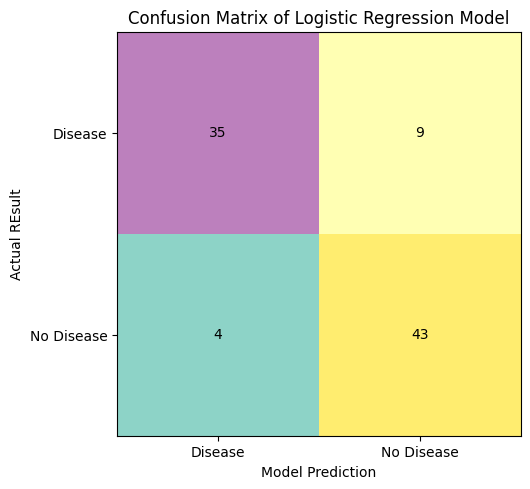

Accuracy of our model is  85.71428571428571 %


In [147]:
#confusion matrix of model enlarged
options=["Disease", "No Disease"]

fig, ax=plt.subplots()
im=ax.imshow(lr_conf_matrix, cmap="Set3", interpolation='nearest')

#We want to show all ticks...
ax.set_xticks(np.arange(len(options)))
ax.set_yticks(np.arange(len(options)))
#..and label them with the respective list entries
ax.set_xticklabels(options)
ax.set_yticklabels(options)

#Loop over data dimensions and create text annotations
for i in range(len(options)):
  for j in range(len(options)):
    text=ax.text(j, i,lr_conf_matrix[i,j], ha="center", va="center", color="black")

ax.set_title("Confusion Matrix of Logistic Regression Model")
fig.tight_layout()
plt.xlabel('Model Prediction')
plt.ylabel('Actual REsult')
plt.show()
print("Accuracy of our model is ", lr_acc_score*100, "%")


we used a LR model as a best performing model
We have succesfully made our model which predicts weather a person is having a risk of HeartAttack or not with 85.7% accuracy.
We also can perform this kind of prediction with a single line of code by using EvalML.